In [1]:
import tensorflow as tf #shift+enter to run


# Loading - MNIST Data Set
## Containing training samples=60,000, testing samples=10,000
### Tensorflow already contain MNIST dataset which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist #handwritten characters based on 28*28 sized images of 0 to 9

## After loading the MNIST data, drive into train and test datasets

In [3]:
## unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

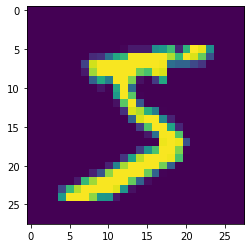

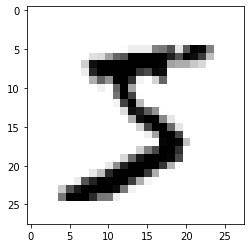

In [5]:
## just checking the graph,how data looklike
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() ## in order to execute the graph
## however we don't know whether its color image or binary image
## so in order to plot it, change the configuration
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Checking the values of each pixel
## Before Normalization

In [6]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in grays level (1 channel==> 0 to 225), not Colored (RGB)
# Normalizing the data | Pre-processing step

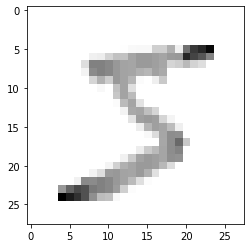

In [7]:
### in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test = tf.keras.utils.normalize (x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## After Normalization

In [8]:
print (x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print (y_train[0]) ## just to check that we have labels inside our network

5


## Resizing image to make it suitable for applying Convolution operation

In [10]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##increasing one dimension for kernal operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##increasing one dimension for kernal operation
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
#### Creating a neural network now
model = Sequential()

#### first Convolution layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution layer to maintain input layer size
model.add(Activation("relu"))## activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling single maximum valuw of 2cross2

#### 2nd Convolution layer
model.add(Conv2D(64,(3,3)))##2nd convolution layer
model.add(Activation("relu"))## activation function
model.add(MaxPooling2D(pool_size=(2,2)))##Maxpooling

#### 3rd Convolution layer
model.add(Conv2D(64,(3,3))) #24*24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### fully connected layer#1 20 into 20=400
model.add(Flatten()) ## before usinf fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#### fully connected layer#2
model.add(Dense(32))
model.add(Activation("relu"))


#### last fully connected layer
model.add(Dense(10))## this last layer must be equal to 10
model.add(Activation('softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("total training sample = ",len(x_trainr))

total training sample =  60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])


In [17]:
training_history=model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3) ##training our model

Epoch 1/5
1313/1313 [==============================] - 55s 41ms/step - loss: 0.3398 - accuracy: 0.8935 - val_loss: 0.1738 - val_accuracy: 0.9489
Epoch 2/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.1090 - accuracy: 0.9671 - val_loss: 0.0975 - val_accuracy: 0.9707
Epoch 3/5
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0775 - accuracy: 0.9765 - val_loss: 0.0713 - val_accuracy: 0.9780
Epoch 4/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.0742 - val_accuracy: 0.9773
Epoch 5/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0759 - val_accuracy: 0.9767


## Loss plot curve for training and validation

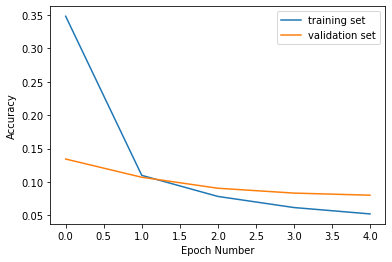

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

## Accuracy plot curve for training and validation

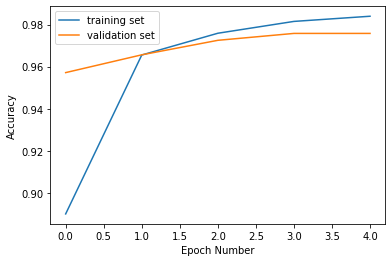

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [20]:
### evaluating on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples",test_loss)
print("validation accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0820 - accuracy: 0.9754
test loss on 10,000 test samples 0.08195929229259491
validation accuracy on 10,000 test samples 0.9753999710083008


In [21]:
#there is specialized mehod for efficiently saving your model, to name all input
predicions = model.predict([x_testr])

313/313 [==============================] - 3s 10ms/step


In [22]:
print(predicions)

[[2.5996692e-06 1.3467306e-04 3.6381894e-05 ... 9.9979693e-01
  1.3731423e-07 1.0690506e-05]
 [7.7246623e-05 6.3768864e-05 9.9972957e-01 ... 4.2021817e-05
  6.2467632e-05 1.6578736e-07]
 [1.3421312e-08 9.9999523e-01 3.6673619e-06 ... 6.3260700e-07
  7.4980455e-10 9.3013669e-10]
 ...
 [9.7601205e-10 5.0303055e-07 9.8109867e-09 ... 1.4057732e-06
  5.0787599e-05 7.9755068e-07]
 [1.3832963e-04 1.4786079e-07 5.7487113e-09 ... 4.0936663e-09
  5.4160897e-05 4.6745525e-05]
 [2.6472696e-04 3.1457151e-07 4.4048952e-06 ... 6.3664203e-07
  5.2270555e-04 4.9237329e-05]]


In [23]:
 print(np.argmax(predicions[0]))

7


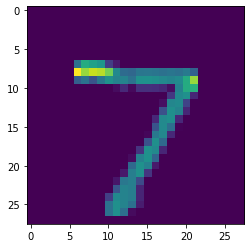

In [24]:
 plt.imshow(x_test[0])
    

In [25]:
print(np.argmax(predicions[128]))

8


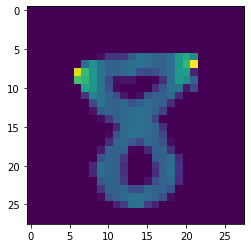

In [26]:
plt.imshow(x_test[128])


In [27]:
import cv2

In [28]:
img = cv2.imread('three.png')

TypeError: Image data of dtype object cannot be converted to float

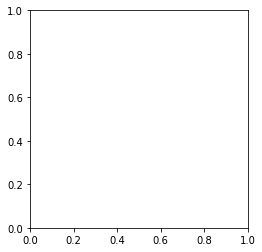

In [29]:
plt.imshow(img)

In [30]:
def image():
    img.shape
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray.shape
    resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
    resized.shape
    newimg = tf.keras.utils.normalize (resized, axis=1) # 0 to 1 scaling
    newimg = np.array(newimg).reshape(-1, IMG_SIZE,IMG_SIZE,1) # kernal operation of convolution layer
    newimg.shape
    predictions = model.predict(newimg)
    print("The given image has digit:",np.argmax(predictions))
image()    
    

AttributeError: 'NoneType' object has no attribute 'shape'